<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/Preprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Format CSV

In [1]:
import pandas as pd
from google.colab import files

In [2]:
# Read the original CSV file with ";" as the delimiter
data = pd.read_csv('bank-additional-full.csv', sep=';', engine='python')

# Overwrite the original CSV file with properly separated columns
data.to_csv('bank.csv', index=False)

# Display the first few rows to confirm the changes
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
# Download the updated file
files.download('bank.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Handle Missing Value

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values for numeric columns with the median
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values for non-numeric columns with the mode (most frequent value)
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Save the dataset with handled missing values to another CSV file
missing_values_handled_file_path = 'missing-values-handled.csv'
data.to_csv(missing_values_handled_file_path, index=False)

# Display the first few rows of the dataset
print(data.head())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<ipython-input-4-9a983167e5d8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
# Download the updated file
files.download('missing-values-handled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Handle Duplicate

In [6]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
data = data.drop_duplicates()

# Save the dataset after removing duplicates to another CSV file
duplicates_handled_file_path = 'duplicates-handled.csv'
data.to_csv(duplicates_handled_file_path, index=False)

# Display the first few rows of the dataset after handling duplicates
print(data.head())


Number of duplicate rows: 12
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

In [7]:
# Download the updated file
files.download('duplicates-handled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Feature Importance

In [8]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

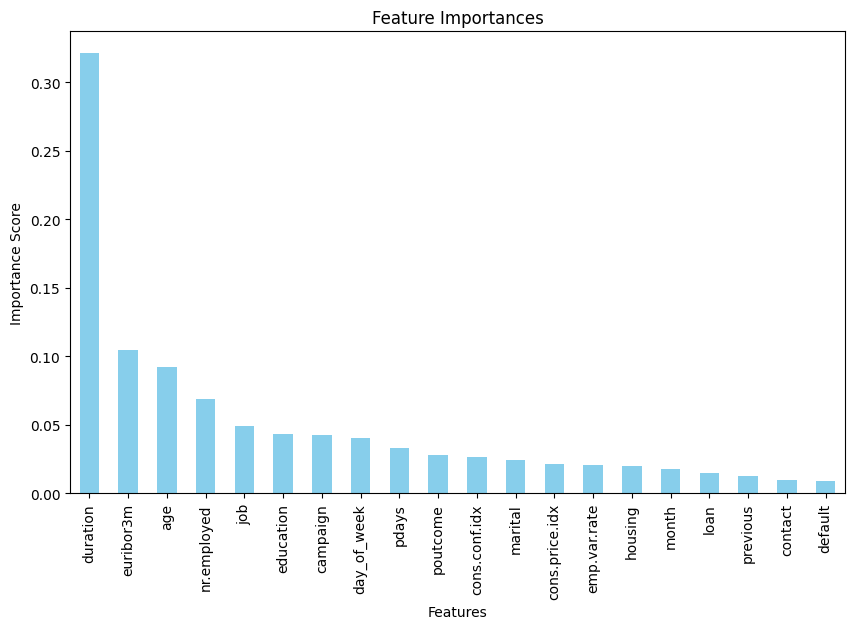

In [9]:
# Load the dataset
data = pd.read_csv('duplicates-handled.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable as integers
y = label_encoder.fit_transform(data['y'])

# Encode all categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'y':  # Skip the target variable
        data[col] = label_encoder.fit_transform(data[col])

# Split features and target variable
X = data.drop('y', axis=1)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


###Feature Selection

In [10]:
# Drop the specified columns
data = pd.read_csv('duplicates-handled.csv')
data_cleaned = data.drop(['duration', 'contact', 'default'], axis=1)

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('Feature_selection.csv', index=False)

# Verify the new dataset by displaying the first few rows
print(data_cleaned.head())

   age        job  marital    education housing loan month day_of_week  \
0   56  housemaid  married     basic.4y      no   no   may         mon   
1   57   services  married  high.school      no   no   may         mon   
2   37   services  married  high.school     yes   no   may         mon   
3   40     admin.  married     basic.6y      no   no   may         mon   
4   56   services  married  high.school      no  yes   may         mon   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent           1.1          93.994   
1         1    999         0  nonexistent           1.1          93.994   
2         1    999         0  nonexistent           1.1          93.994   
3         1    999         0  nonexistent           1.1          93.994   
4         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1         

In [11]:
# Download the updated file
files.download('Feature_selection.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

age               0.198561
euribor3m         0.135008
campaign          0.091891
job               0.089242
education         0.079229
nr.employed       0.077060
day_of_week       0.058839
marital           0.042199
pdays             0.039093
housing           0.038870
poutcome          0.028871
loan              0.027427
emp.var.rate      0.022736
cons.conf.idx     0.020982
cons.price.idx    0.018147
previous          0.015971
month             0.015875
dtype: float64


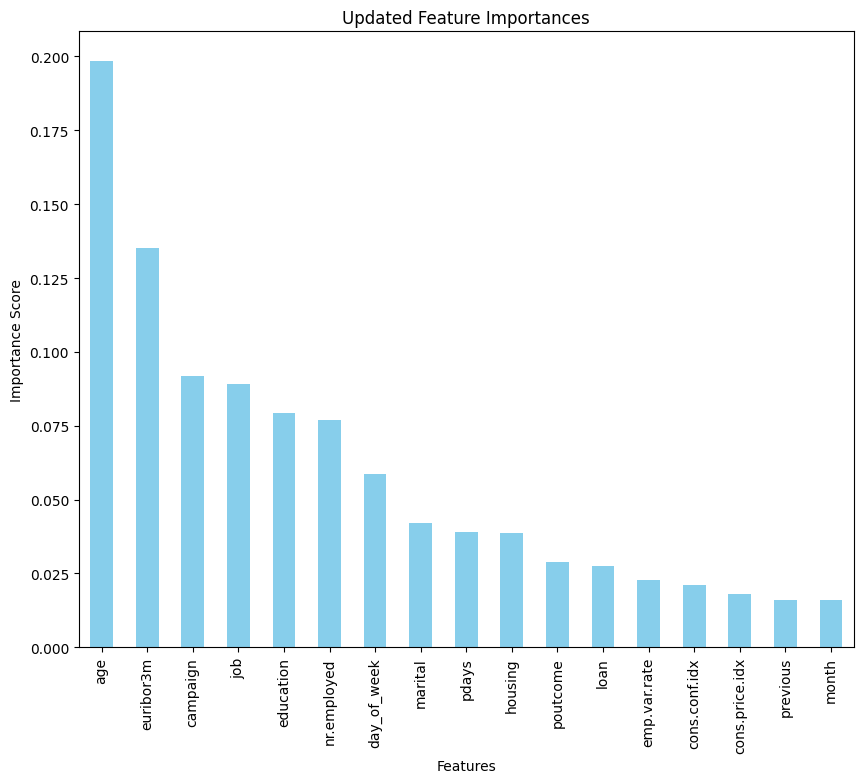

In [13]:
# Load the cleaned dataset
data_cleaned = pd.read_csv('Feature_selection.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable as integers
y = label_encoder.fit_transform(data_cleaned['y'])

# Encode all categorical features
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'y':  # Skip the target variable
        data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Split features and target variable
X_cleaned = data_cleaned.drop('y', axis=1)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_cleaned, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_cleaned.columns)

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Display the most important features
print(sorted_features)

# Visualize feature importances
plt.figure(figsize=(10, 8))
sorted_features.plot(kind='bar', color='skyblue')
plt.title('Updated Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


###Outlier detection

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

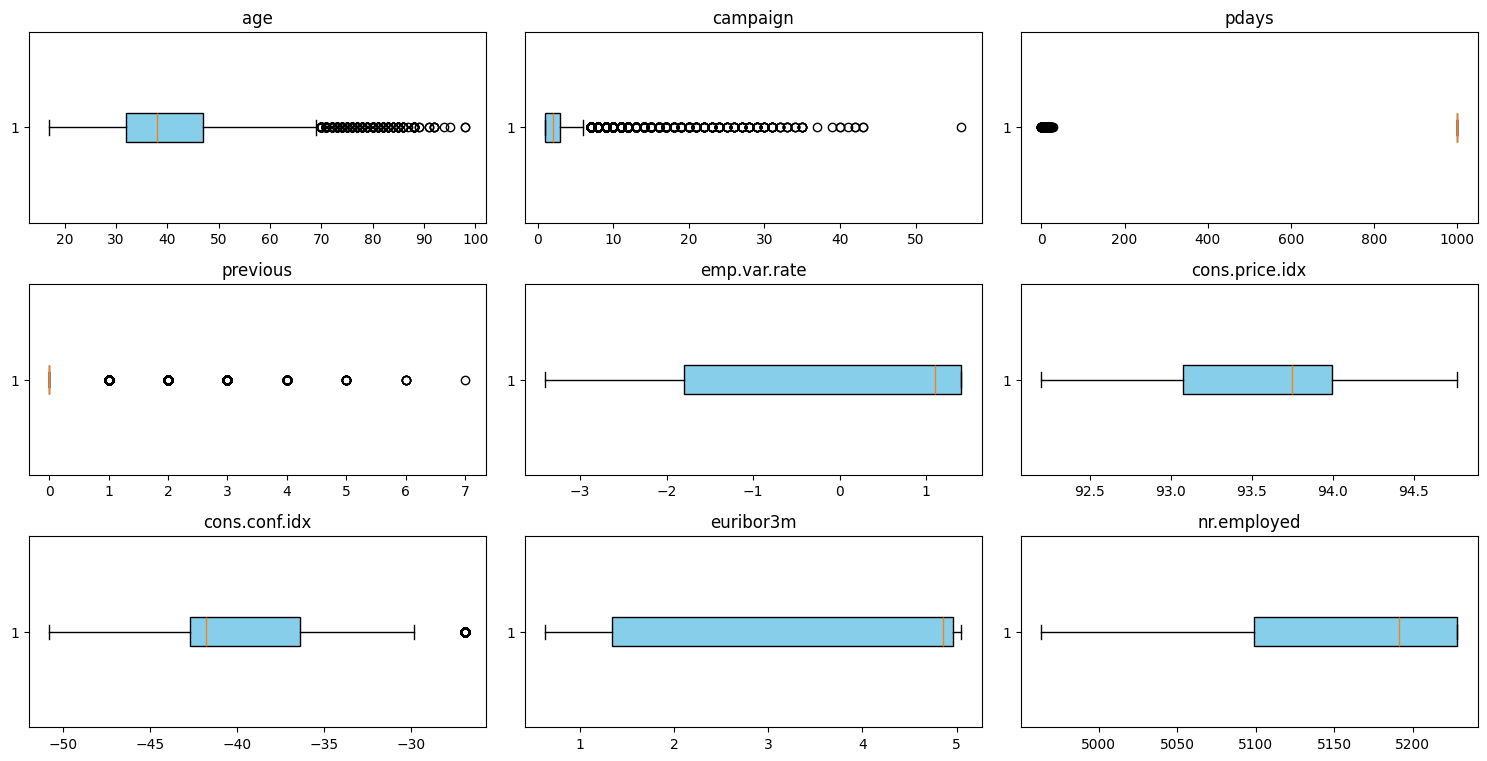

In [15]:
# Load the dataset
data = pd.read_csv('Feature_selection.csv')

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Arrange plots in rows of 3
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(column)

plt.tight_layout()
plt.show()


###Outlier Handling

###Data Encoding

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [17]:
# Load the dataset
data = pd.read_csv('Feature_selection.csv')

# Identify categorical columns for one-hot encoding and label encoding
one_hot_columns = ['marital', 'education', 'housing', 'loan','poutcome','job', 'month', 'day_of_week']  # Categorical with few unique values
label_encoding_columns = ['y']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Apply label encoding
label_encoders = {}
for column in label_encoding_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert True/False columns to 1/0
boolean_columns = data.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    data[column] = data[column].astype(int)

# Save the encoded dataset to a new CSV file
encoded_file_path = 'bank-encoded.csv'
data.to_csv(encoded_file_path, index=False)

# Display the first few rows of the encoded dataset
print(data.head())


   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_jun  month_mar  \
0          -36.4      4.857       5191.0  0  ...          0          0   
1          -36.4      4.857       5191.0  0  ...          0          0   
2          -36.4      4.857       5191.0  0  ...          0          0   
3          -36.4      4.857       5191.0  0  ...          0          0   
4          -36.4      4.857       5191.0  0  ...          0          0   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          1          0          0          0                1   
1          1        

In [18]:
# Download the updated file
files.download('bank-encoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Pdays

In [19]:
# Replace 999 with 0 and other values with 1 in the 'pdays' column
data['pdays'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Reorder columns to display 'y' at the last
columns = [col for col in data.columns if col != 'y'] + ['y']
data = data[columns]

# Save the updated dataset to a new CSV file
encoded_file_path = 'bank-encoded-updated.csv'
data.to_csv(encoded_file_path, index=False)

# Display the first few rows of the updated dataset
print(data.head())


   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1      0         0           1.1          93.994   
1   57         1      0         0           1.1          93.994   
2   37         1      0         0           1.1          93.994   
3   40         1      0         0           1.1          93.994   
4   56         1      0         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  marital_married  ...  month_mar  \
0          -36.4      4.857       5191.0                1  ...          0   
1          -36.4      4.857       5191.0                1  ...          0   
2          -36.4      4.857       5191.0                1  ...          0   
3          -36.4      4.857       5191.0                1  ...          0   
4          -36.4      4.857       5191.0                1  ...          0   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          1          0          0          0                1   
1 

In [20]:
# Download the updated file
files.download('bank-encoded-updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Class Imbalance

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

y
0    36537
1     4639
Name: count, dtype: int64


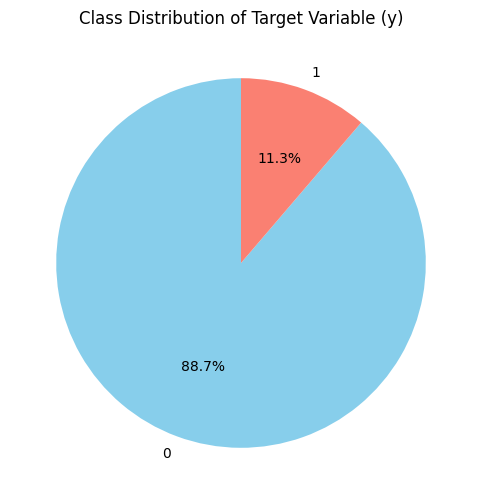

In [22]:
# Load the scaled dataset
data = pd.read_csv('bank-encoded-updated.csv')

# Check the distribution of the target variable 'y'
target_counts = data['y'].value_counts()

# Display the counts for each class
print(target_counts)

# Visualize the class distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable (y)')
plt.show()

###Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
data = pd.read_csv('missing-values-handled.csv')

# Identify numerical columns for scaling
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the scaled dataset to a new CSV file
scaled_file_path = 'bank-scaled.csv'
data.to_csv(scaled_file_path, index=False)

# Display the first few rows of the scaled dataset
print(data.head())


        age       job   marital  education   default   housing      loan  \
0  1.533034 -0.201579 -0.283741  -1.753925 -0.513600 -1.087707 -0.452491   
1  1.628993  0.911227 -0.283741  -0.349730  1.945327 -1.087707 -0.452491   
2 -0.290186  0.911227 -0.283741  -0.349730 -0.513600  0.942127 -0.452491   
3 -0.002309 -1.036184 -0.283741  -1.285860 -0.513600 -1.087707 -0.452491   
4  1.533034  0.911227 -0.283741  -0.349730 -0.513600 -1.087707  2.311440   

   contact     month  day_of_week  ...  campaign     pdays  previous  \
0  1.31827  0.762558    -0.718834  ... -0.567968  0.191842 -0.349494   
1  1.31827  0.762558    -0.718834  ... -0.567968  0.191842 -0.349494   
2  1.31827  0.762558    -0.718834  ... -0.567968  0.191842 -0.349494   
3  1.31827  0.762558    -0.718834  ... -0.567968  0.191842 -0.349494   
4  1.31827  0.762558    -0.718834  ... -0.567968  0.191842 -0.349494   

   poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  0.192622      0.504484        0.6840

In [ ]:
# Download the updated file
files.download('bank-scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>